## Notebook that Generates All Tables For Classifier Performance Bucket 1

In [4]:
from sklearn.metrics import roc_auc_score, average_precision_score
import pandas as pd
import numpy as np
import os, glob

### Test Set Performance

In [8]:
import pdb
from sklearn.metrics import roc_auc_score

def test_load_predictions(df):
    """
    Reads in output of df, computes AUROC for each classifier and asserts that it equals the AUROC
    listed in the auroc.txt file associate with the classfier's directory
    """
    base_path="/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}"
    abx_options = ["Vancomycin",
               "Ampicillin",
               "Cefazolin",
               "Ceftriaxone",
               "Cefepime",
               "Zosyn",
               "Ciprofloxacin",
               "Meropenem",
               "Vancomycin_Meropenem",
               "Vancomycin_Zosyn",
               "Vancomycin_Cefepime",
               "Vancomycin_Ceftriaxone"
               ]
    for abx in abx_options:
        path = base_path.format(abx=abx)
        f_auroc = os.path.join(path, 'auroc.txt')
        with open(f_auroc, 'r') as f:
            auroc = round(float(f.read()), 3)
        
        computed_auroc = round(roc_auc_score(df['%s_label' % abx], df['%s_predictions' % abx]), 3)
        
        try:
            assert auroc == computed_auroc
        except:
            pdb.set_trace()
        print("%s_auroc: %s"% (abx, str(auroc)))

def load_predictions():
    """Helper function that loads predictions from AST classifiers for test set data"""
    
    base_path="/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}"
    abx_options = ["Vancomycin",
                   "Ampicillin",
                   "Cefazolin",
                   "Ceftriaxone",
                   "Cefepime",
                   "Zosyn",
                   "Ciprofloxacin",
                   "Meropenem",
                   "Vancomycin_Meropenem",
                   "Vancomycin_Zosyn",
                   "Vancomycin_Cefepime",
                   "Vancomycin_Ceftriaxone"
                   ]
    df = pd.DataFrame()
    for i, abx in enumerate(abx_options):
        path = base_path.format(abx=abx)
        f_path = glob.glob(os.path.join(path, '*predictions.csv'))[0]
        if i == 0:
            df = pd.read_csv(f_path)
            df = df[['anon_id', 'pat_enc_csn_id_coded', 'label', 'predictions']]
            df = df.rename(columns={'label' : '%s_label' % abx,
                                    'predictions' : '%s_predictions' % abx})
        else:
            df_preds = pd.read_csv(f_path)
            df_preds = df_preds[['anon_id', 'pat_enc_csn_id_coded', 'label', 'predictions']]
            df_preds = df_preds.rename(columns={'label' : '%s_label' % abx,
                                                'predictions' : '%s_predictions' % abx})
            df = df.merge(df_preds, how='left', on=['anon_id', 'pat_enc_csn_id_coded'])
    
    return df
    
df = load_predictions()
test_load_predictions(df)

Vancomycin_auroc: 0.717
Ampicillin_auroc: 0.621
Cefazolin_auroc: 0.674
Ceftriaxone_auroc: 0.688
Cefepime_auroc: 0.649
Zosyn_auroc: 0.641
Ciprofloxacin_auroc: 0.611
Meropenem_auroc: 0.685
Vancomycin_Meropenem_auroc: 0.731
Vancomycin_Zosyn_auroc: 0.699
Vancomycin_Cefepime_auroc: 0.697
Vancomycin_Ceftriaxone_auroc: 0.669


In [9]:
# Create Table with bootstrapped 95% CI intervals for auroc and average precision

,anon_id,pat_enc_csn_id_coded,Vancomycin_label,Vancomycin_predictions,Ampicillin_label,Ampicillin_predictions,Cefazolin_label,Cefazolin_predictions,Ceftriaxone_label,Ceftriaxone_predictions,...,Meropenem_label,Meropenem_predictions,Vancomycin_Meropenem_label,Vancomycin_Meropenem_predictions,Vancomycin_Zosyn_label,Vancomycin_Zosyn_predictions,Vancomycin_Cefepime_label,Vancomycin_Cefepime_predictions,Vancomycin_Ceftriaxone_label,Vancomycin_Ceftriaxone_predictions
0,JC2a03b24,131260812263,0,0.108161,0,0.462078,0,0.664275,1,0.798270,...,1,0.896608,1,0.987670,1,0.964979,1,0.961668,1,0.871461
1,JCe45a3c,131260883970,1,0.483241,1,0.538177,0,0.631024,0,0.784364,...,0,0.883272,1,0.987744,1,0.966207,1,0.970636,1,0.904466
2,JCd235bb,131261001599,0,0.215610,0,0.501686,1,0.631382,1,0.653581,...,1,0.815785,1,0.988870,1,0.965573,1,0.956648,1,0.897293
3,JCd29af0,131261001696,0,0.321022,0,0.351406,0,0.459186,0,0.424984,...,1,0.554059,1,0.980191,1,0.947425,1,0.948773,0,0.805817
4,JCd356bf,131261014293,1,0.421153,1,0.412029,1,0.528823,1,0.724792,...,1,0.839434,1,0.954408,1,0.963848,1,0.946225,1,0.840946


In [19]:
def bootstrapped_performance(labels, predictions):
    """Given labels and predictions, bootstraps auroc and average precision
       and returns mean values along with 95%ci range for both of them"""
    
    aurocs,  average_precisions = [], []
    inds = [i for i in range(len(labels))]
    for i in range(1000):
        inds_boot = np.random.choice(inds, size=len(inds), replace=True)
        labels_b = labels[inds_boot]
        predictions_b = predictions[inds_boot]
        aurocs.append(roc_auc_score(labels_b, predictions_b))
        average_precisions.append(average_precision_score(labels_b, predictions_b))
    
    mean_auc = np.mean(aurocs)
    auc_low = np.percentile(aurocs, 2.5)
    auc_high = np.percentile(aurocs, 97.5)
    auroc = "%.2f [%.2f, %.2f]" % (mean_auc, auc_low, auc_high)
    
    mean_ap = np.mean(average_precisions)
    ap_low = np.percentile(average_precisions, 2.5)
    ap_high = np.percentile(average_precisions, 97.5)
    average_precision = "%.2f [%.2f, %.2f]" % (mean_ap, ap_low, ap_high)
    
    prev = str(round(np.average(labels), 2))
    
    return auroc, average_precision, prev


df_test_results = pd.DataFrame()
abx_options = ["Vancomycin",
               "Ampicillin",
               "Cefazolin",
               "Ceftriaxone",
               "Cefepime",
               "Zosyn",
               "Ciprofloxacin",
               "Meropenem",
               "Vancomycin_Meropenem",
               "Vancomycin_Zosyn",
               "Vancomycin_Cefepime",
               "Vancomycin_Ceftriaxone"
               ]

df_test_results['Antibiotic Selection'] = [a for a in abx_options]


base_path = "/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}"
best_model_classes = []
prevs = []
aps = []
aurocs = []
for abx in abx_options:
    path = base_path.format(abx=abx)
    f_path = glob.glob(os.path.join(path, '*predictions.csv'))[0]
    best_model_class = f_path.split('/')[-1].split('_')[0]
    best_model_classes.append(best_model_class)
    auroc, ap, prev = bootstrapped_performance(df['%s_label' % abx].values,
                                               df['%s_predictions' % abx].values)
    prevs.append(prev)
    aps.append(ap)
    aurocs.append(auroc)
df_test_results['Best Model Class'] = best_model_classes
df_test_results['Positive Class Prevalence'] = prevs
df_test_results['Average Precision'] = aps
df_test_results['AUROC'] = aurocs

In [20]:
df_test_results.head()

,Antibiotic Selection,Best Model Class,Positive Class Prevalence,Average Precision,AUROC
0,Vancomycin,lightgbm,0.23,"0.46 [0.40, 0.52]","0.72 [0.68, 0.75]"
1,Ampicillin,lightgbm,0.43,"0.54 [0.49, 0.58]","0.62 [0.59, 0.65]"
2,Cefazolin,lightgbm,0.59,"0.72 [0.68, 0.76]","0.67 [0.64, 0.70]"
3,Ceftriaxone,lightgbm,0.66,"0.79 [0.77, 0.82]","0.69 [0.66, 0.72]"
4,Cefepime,random,0.8,"0.87 [0.84, 0.89]","0.65 [0.61, 0.69]"


In [23]:
df_test_results = df_test_results.sort_values('Positive Class Prevalence')

In [24]:
df_test_results.to_csv("Table 3: Bucket 1 Classifier Results.csv", index=None)

### Test Set AUROC For Unseen patients vs patients that have been seen, and the two combined.  

In [49]:
# Query set patients from train + val sets. 
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/conorcorbin/.config/gcloud/application_default_credentials.json' 
os.environ['GCLOUD_PROJECT'] = 'mining-clinical-decisions' 
%load_ext google.cloud.bigquery

from google.cloud import bigquery
client=bigquery.Client()

# Read in feature type dataframe so we can map to it
query="""
SELECT DISTINCT
    anon_id
FROM 
    `mining-clinical-decisions.abx.final_ast_labels`
WHERE 
    EXTRACT(YEAR FROM index_time) < 2019
"""
query_job = client.query(query)
df_training_pats = query_job.result().to_dataframe()

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [51]:
train_val_pats = set(df_training_pats.anon_id.values)
len(train_val_pats)

5705

In [70]:
def bootstrapped_auroc(labels, predictions):
    """Given labels and predictions, bootstraps auroc and average precision
       and returns mean values along with 95%ci range for both of them"""
    
    aurocs = []
    inds = [i for i in range(len(labels))]
    print("Number of positive labels:{pos} Number of Labels:{total}".format(pos=str(labels.sum()),
                                                                            total=str(len(labels))))
    for i in range(1000):
        inds_boot = np.random.choice(inds, size=len(inds), replace=True)
        labels_b = labels[inds_boot]
        predictions_b = predictions[inds_boot]
        aurocs.append(roc_auc_score(labels_b, predictions_b))
    
    mean_auc = np.mean(aurocs)
    auc_low = np.percentile(aurocs, 2.5)
    auc_high = np.percentile(aurocs, 97.5)
    auroc = "%.2f [%.2f, %.2f]" % (mean_auc, auc_low, auc_high)

    return auroc

def stratified_bootstrapped_auroc(labels, predictions):
    """Given labels and predictions, bootstraps auroc and average precision
       and returns mean values along with 95%ci range for both of them"""
    
    df_hats = pd.DataFrame(data={
        'labels' : labels,
        'predictions' : predictions
    })
    
    aurocs = []
    inds = [i for i in range(len(labels))]
    print("Number of positive labels:{pos} Number of Labels:{total}".format(pos=str(labels.sum()),
                                                                            total=str(len(labels))))
    for i in range(1000):
        
        df_hats_boot = pd.DataFrame()
        for l in np.unique(labels):
            df_temp = (df_hats
                .query("labels == @l", engine='python')
                .sample(n=len(df_hats[df_hats['labels']==l]), replace=True)
            )
            df_hats_boot = pd.concat([df_hats_boot, df_temp])
        
        aurocs.append(roc_auc_score(df_hats_boot['labels'], df_hats_boot['predictions']))
    
    mean_auc = np.mean(aurocs)
    auc_low = np.percentile(aurocs, 2.5)
    auc_high = np.percentile(aurocs, 97.5)
    auroc = "%.2f [%.2f, %.2f]" % (mean_auc, auc_low, auc_high)
    
    return auroc



df_test_results = pd.DataFrame()
abx_options = ["Vancomycin",
               "Ampicillin",
               "Cefazolin",
               "Ceftriaxone",
               "Cefepime",
               "Zosyn",
               "Ciprofloxacin",
               "Meropenem",
               "Vancomycin_Meropenem",
               "Vancomycin_Zosyn",
               "Vancomycin_Cefepime",
               "Vancomycin_Ceftriaxone"
               ]

df_test_results['Antibiotic Selection'] = [a for a in abx_options]


base_path = "/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}"
aurocs_total, aurocs_repeat, aurocs_no_repeat = [], [], []
for abx in abx_options:
    print(abx)
    path = base_path.format(abx=abx)
    f_path = glob.glob(os.path.join(path, '*predictions.csv'))[0]
    df = pd.read_csv(f_path)
    df_no_repeat_pats = (df
        .query("anon_id not in @train_val_pats", engine='python')
    )
    df_repeat_pats = (df
        .query("anon_id in @train_val_pats", engine='python')
    )
    print("Full")
    auroc_t = stratified_bootstrapped_auroc(df['label'].values,
                               df['predictions'].values)
    print("Repeat")
    aurocs_r = stratified_bootstrapped_auroc(df_repeat_pats['label'].values,
                                       df_repeat_pats['predictions'].values)
    print("No Repeat")
    aurocs_nr = stratified_bootstrapped_auroc(df_no_repeat_pats['label'].values,
                                          df_no_repeat_pats['predictions'].values)
    aurocs_total.append(auroc_t)
    aurocs_repeat.append(aurocs_r)
    aurocs_no_repeat.append(aurocs_nr)
    
df_test_results['AUROC All Observations'] = aurocs_total
df_test_results['AUROC Patients Seen In Training'] = aurocs_repeat
df_test_results['AUROC Patients Not Seen In Training'] = aurocs_no_repeat

Vancomycin
Full
Number of positive labels:302 Number of Labels:1320
Repeat
Number of positive labels:35 Number of Labels:216
No Repeat
Number of positive labels:267 Number of Labels:1104
Ampicillin
Full
Number of positive labels:564 Number of Labels:1320
Repeat
Number of positive labels:76 Number of Labels:216
No Repeat
Number of positive labels:488 Number of Labels:1104
Cefazolin
Full
Number of positive labels:780 Number of Labels:1320
Repeat
Number of positive labels:117 Number of Labels:216
No Repeat
Number of positive labels:663 Number of Labels:1104
Ceftriaxone
Full
Number of positive labels:876 Number of Labels:1320
Repeat
Number of positive labels:131 Number of Labels:216
No Repeat
Number of positive labels:745 Number of Labels:1104
Cefepime
Full
Number of positive labels:1055 Number of Labels:1320
Repeat
Number of positive labels:171 Number of Labels:216
No Repeat
Number of positive labels:884 Number of Labels:1104
Zosyn
Full
Number of positive labels:1190 Number of Labels:1320

In [71]:
df_test_results

,Antibiotic Selection,AUROC All Observations,AUROC Patients Seen In Training,AUROC Patients Not Seen In Training
0,Vancomycin,"0.72 [0.68, 0.75]","0.64 [0.53, 0.74]","0.72 [0.69, 0.76]"
1,Ampicillin,"0.62 [0.59, 0.65]","0.65 [0.57, 0.72]","0.61 [0.57, 0.64]"
2,Cefazolin,"0.67 [0.64, 0.70]","0.72 [0.66, 0.78]","0.66 [0.63, 0.70]"
3,Ceftriaxone,"0.69 [0.66, 0.72]","0.75 [0.68, 0.82]","0.67 [0.64, 0.71]"
4,Cefepime,"0.65 [0.61, 0.69]","0.70 [0.61, 0.78]","0.64 [0.60, 0.67]"
5,Zosyn,"0.64 [0.59, 0.69]","0.74 [0.62, 0.84]","0.62 [0.56, 0.68]"
6,Ciprofloxacin,"0.61 [0.58, 0.64]","0.67 [0.60, 0.74]","0.60 [0.57, 0.63]"
7,Meropenem,"0.69 [0.65, 0.72]","0.69 [0.61, 0.78]","0.68 [0.64, 0.72]"
8,Vancomycin_Meropenem,"0.73 [0.65, 0.80]","0.77 [0.59, 0.94]","0.73 [0.63, 0.81]"
9,Vancomycin_Zosyn,"0.70 [0.62, 0.77]","0.74 [0.56, 0.89]","0.68 [0.59, 0.77]"


In [72]:
df_test_results.to_csv('test_results_repeat_patients.csv', index=None)

### Get Classifier Performance Stratified By Various Demographic Factors
* Age Buckets, Sex, Race, Ethnicity 

In [89]:
### Pull in Demographics for patients in the test set
query="""
WITH cohort AS (
SELECT DISTINCT
  anon_id, pat_enc_csn_id_coded, index_time
FROM
    `mining-clinical-decisions.abx.final_ast_labels`
WHERE 
    EXTRACT(YEAR FROM index_time) = 2019
),

adt_dep as (
SELECT DISTINCT
  adt.pat_enc_csn_id_coded, 
  FIRST_VALUE (dm.department_name) OVER 
  (PARTITION BY adt.pat_enc_csn_id_coded ORDER BY adt.effective_time_jittered_utc) department_name,
FROM 
  `shc_core.adt` adt
INNER JOIN
  `som-nero-phi-jonc101.shc_core.dep_map` dm
USING
  (department_id)
)

SELECT DISTINCT 
  dep.department_name,
  DATE_DIFF(CAST(c.index_time as DATE), d.BIRTH_DATE_JITTERED, year) age,
  c.pat_enc_csn_id_coded,
  d.ANON_ID, d.GENDER, d.CANONICAL_RACE, d.CANONICAL_ETHNICITY,
  CASE WHEN d.LANGUAGE = "English" THEN "English"
  ELSE "Non-English" END LANGUAGE,
  CASE WHEN d.INSURANCE_PAYOR_NAME = "MEDICARE" THEN "Medicare"
  WHEN d.INSURANCE_PAYOR_NAME = "MEDI-CAL" THEN "Medi-Cal"
  ELSE "Other" END INSURANCE_PAYOR_NAME,
FROM 
  `som-nero-phi-jonc101.shc_core.demographic` d
INNER JOIN
  cohort c
ON
  d.ANON_ID = c.anon_id
INNER JOIN
  adt_dep dep
ON
  c.pat_enc_csn_id_coded = dep.pat_enc_csn_id_coded
"""
query_job = client.query(query)
df_demographics = query_job.result().to_dataframe()

In [90]:
df_demographics.head()

,department_name,age,pat_enc_csn_id_coded,ANON_ID,GENDER,CANONICAL_RACE,CANONICAL_ETHNICITY,LANGUAGE,INSURANCE_PAYOR_NAME
0,VCP EMERGENCY DEPARTMENT,48,131279662007,JCe4e13e,Female,Other,Non-Hispanic,English,Other
1,VCP EMERGENCY DEPARTMENT,89,131281252021,JCe2b219,Male,White,Non-Hispanic,English,Medicare
2,VCP EMERGENCY DEPARTMENT,61,131261910706,JCd3dd22,Female,White,Non-Hispanic,English,Other
3,VCP EMERGENCY DEPARTMENT,71,131263079242,JCeaf557,Male,White,Non-Hispanic,English,Medicare
4,PEDIATRIC EMERGENCY DEPARTMENT,89,131263879137,JCdb3d71,Male,White,Non-Hispanic,English,Medicare


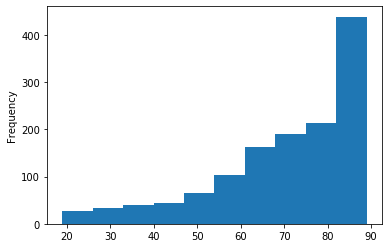

In [91]:
df_demographics['age'].plot.hist()

In [92]:
df_demographics.groupby('department_name').agg(num_observations=('pat_enc_csn_id_coded', 'nunique'))

,num_observations
department_name,
ADULT EMERGENCY DEPARTMENT,94
PEDIATRIC EMERGENCY DEPARTMENT,761
VCP EMERGENCY DEPARTMENT,465


In [93]:
df_demo = (df_demographics
    .assign(department_name=lambda x: ['Stanford ED' if a != 'VCP EMERGENCY DEPARTMENT' else 'Valley Care ED'
                                       for a in x.department_name])
)
df_demo.head()

,department_name,age,pat_enc_csn_id_coded,ANON_ID,GENDER,CANONICAL_RACE,CANONICAL_ETHNICITY,LANGUAGE,INSURANCE_PAYOR_NAME
0,Valley Care ED,48,131279662007,JCe4e13e,Female,Other,Non-Hispanic,English,Other
1,Valley Care ED,89,131281252021,JCe2b219,Male,White,Non-Hispanic,English,Medicare
2,Valley Care ED,61,131261910706,JCd3dd22,Female,White,Non-Hispanic,English,Other
3,Valley Care ED,71,131263079242,JCeaf557,Male,White,Non-Hispanic,English,Medicare
4,Stanford ED,89,131263879137,JCdb3d71,Male,White,Non-Hispanic,English,Medicare


In [94]:
df_demo.shape

(1320, 9)

In [110]:
def _get_perf_by_strata(df, aurocs, column_name, name='race'):
    aurocs[name] = {}
    strata = df[column_name].unique()
    for s in strata:
        df_strata = df[df[column_name]==s]
        num_positive = df_strata['label'].sum()
        total = len(df_strata)
        # Check if we have at least one sample from each class
        if len(df_strata['label'].unique()) != 2:
            aurocs[name][s] = (num_positive, total, np.nan) # auroc undefined in this case
        else:
            auc = stratified_bootstrapped_auroc(df_strata['label'].values,
                                                df_strata['predictions'].values)
            aurocs[name][s] = (num_positive, total, auc)
    return aurocs

def get_performance_by_demographics(df):
    """With a pandas dataframe containing labels, predicitons, and variables to stratify over,
       computes performance measures over strata and retuns a table of AUROCS
    """
    aurocs = {}
    
    ### Get performance on all observations
    aurocs[''] = {}
    auc = stratified_bootstrapped_auroc(df['label'].values,
                                        df['predictions'].values)
    num_positive = df['label'].sum()
    total = len(df)
    aurocs['']['All Observations'] = (num_positive, total, auc)
    
    ### Get performance stratified by age buckets. We'll do 18-30, 31-50, 51-60, 61-70, 71-80, 81-90
    buckets = [(18, 30), (31, 50), (51, 60), (61, 70), (71, 80), (81, 90)]
    aurocs['Age'] = {}
    for age_bucket in buckets:
        df_age_bucket = (df
            .query("age >= @age_bucket[0] and age <= @age_bucket[1]", engine='python')
        )
        # Check if we have at least one sample from each class
        num_positive = df_age_bucket['label'].sum()
        total = len(df_age_bucket)
        if len(df_age_bucket['label'].unique()) != 2: 
            aurocs['Age'][age_bucket] = (num_positive, total, np.nan) # auroc undefined in this case
        else:
            auc = stratified_bootstrapped_auroc(df_age_bucket['label'].values,
                                                df_age_bucket['predictions'].values)
            aurocs['Age'][age_bucket] = (num_positive, total, auc)
        
        
    # Get Performance By Other Demographics
    aurocs = _get_perf_by_strata(df, aurocs, 'CANONICAL_RACE', name='Race')
    aurocs = _get_perf_by_strata(df, aurocs, 'department_name', name='Department ID')
    aurocs = _get_perf_by_strata(df, aurocs, 'GENDER', name='Sex')
    aurocs = _get_perf_by_strata(df, aurocs, 'CANONICAL_ETHNICITY', name='Ethnicity')
    aurocs = _get_perf_by_strata(df, aurocs, 'LANGUAGE', name='Language')
    aurocs = _get_perf_by_strata(df, aurocs, 'INSURANCE_PAYOR_NAME', name='Insurance Payer')
    
    
    return aurocs
    
base_path = "/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}"
os.makedirs('./results_by_demographics/', exist_ok=True)
for abx in abx_options:
    df_results = pd.DataFrame()
    print(abx)
    path = base_path.format(abx=abx)
    f_path = glob.glob(os.path.join(path, '*predictions.csv'))[0]
    df = pd.read_csv(f_path)
    df_merged = df_demo.merge(df[['pat_enc_csn_id_coded', 'label', 'predictions']],
                            how='inner', on='pat_enc_csn_id_coded')
    aurocs = get_performance_by_demographics(df_merged)

    for strata_type in aurocs:
        df_results_temp = pd.DataFrame()
        df_results_temp['Stratified By'] = [strata_type for a in range(len(aurocs[strata_type]))]
        strata, num_pos, total, aucs = [], [], [], []
        for group in aurocs[strata_type]:
            strata.append(group)
            num_pos.append(aurocs[strata_type][group][0])
            total.append(aurocs[strata_type][group][1])
            aucs.append(aurocs[strata_type][group][2])

        df_results_temp['Group'] = strata
        df_results_temp['# Positive Examples'] = num_pos
        df_results_temp['# Total Examples'] = total
        df_results_temp['AUROC'] = aucs
        df_results = pd.concat([df_results, df_results_temp])

    # Write to csv
    df_results.to_csv(os.path.join('./results_by_demographics/', '%s_results_by_demographics.csv' % abx), index=None)

Vancomycin
Number of positive labels:302 Number of Labels:1320
Number of positive labels:16 Number of Labels:49
Number of positive labels:40 Number of Labels:132
Number of positive labels:35 Number of Labels:133
Number of positive labels:53 Number of Labels:232
Number of positive labels:77 Number of Labels:308
Number of positive labels:81 Number of Labels:466
Number of positive labels:51 Number of Labels:251
Number of positive labels:184 Number of Labels:757
Number of positive labels:33 Number of Labels:201
Number of positive labels:24 Number of Labels:69
Number of positive labels:8 Number of Labels:30
Number of positive labels:2 Number of Labels:5
Number of positive labels:86 Number of Labels:465
Number of positive labels:216 Number of Labels:855
Number of positive labels:134 Number of Labels:793
Number of positive labels:168 Number of Labels:527
Number of positive labels:259 Number of Labels:1117
Number of positive labels:41 Number of Labels:195
Number of positive labels:2 Number of 

Number of positive labels:5 Number of Labels:7
Number of positive labels:3 Number of Labels:5
Number of positive labels:275 Number of Labels:465
Number of positive labels:553 Number of Labels:855
Number of positive labels:520 Number of Labels:793
Number of positive labels:308 Number of Labels:527
Number of positive labels:702 Number of Labels:1117
Number of positive labels:122 Number of Labels:195
Number of positive labels:4 Number of Labels:8
Number of positive labels:699 Number of Labels:1112
Number of positive labels:129 Number of Labels:208
Number of positive labels:388 Number of Labels:615
Number of positive labels:412 Number of Labels:651
Number of positive labels:28 Number of Labels:54
Meropenem
Number of positive labels:1083 Number of Labels:1320
Number of positive labels:39 Number of Labels:49
Number of positive labels:121 Number of Labels:132
Number of positive labels:113 Number of Labels:133
Number of positive labels:181 Number of Labels:232
Number of positive labels:239 Num

In [108]:
df_results

,Stratified By,Group,# Positive Examples,# Total Examples,AUROC
0,,All Observations,302,1320,"0.72 [0.69, 0.75]"
0,Age,"(18, 30)",16,49,"0.67 [0.51, 0.82]"
1,Age,"(31, 50)",40,132,"0.72 [0.62, 0.81]"
2,Age,"(51, 60)",35,133,"0.66 [0.55, 0.76]"
3,Age,"(61, 70)",53,232,"0.74 [0.66, 0.82]"
4,Age,"(71, 80)",77,308,"0.71 [0.64, 0.78]"
5,Age,"(81, 90)",81,466,"0.70 [0.63, 0.76]"
0,Race,Other,51,251,"0.68 [0.59, 0.77]"
1,Race,White,184,757,"0.71 [0.66, 0.75]"
2,Race,Asian,33,201,"0.73 [0.64, 0.82]"


In [99]:
df_results = pd.DataFrame()
for strata_type in aurocs:
    df_results_temp = pd.DataFrame()
    df_results_temp['Stratified By'] = [strata_type for a in range(len(aurocs[strata_type]))]
    strata, aurocs = [], []
    for group in aurocs[strata_type]:
        strata.append(group)
        aurocs.append(aurocs[strata_type][group])

    df_results_temp['Group'] = strata
    df_results_temp['AUROC'] = aurocs
    df_results = pd.concat([df_results, df_results_temp])

df_results

TypeError: list indices must be integers or slices, not str

## Validation Set Results
Create a table that has four rows for each antibiotic corresponding to model class.  We'll list AUROC on validation set and chosen hyperparameters.  

In [21]:
import json
import pandas as pd
import glob, os
import pdb
import numpy as np
from sklearn.metrics import roc_auc_score
def bootstrapped_performance(labels, predictions):
    """Given labels and predictions, bootstraps auroc and average precision
       and returns mean values along with 95%ci range for both of them"""
    
    aurocs = []
    inds = [i for i in range(len(labels))]
    for i in range(1000):
        inds_boot = np.random.choice(inds, size=len(inds), replace=True)
        labels_b = labels[inds_boot]
        predictions_b = predictions[inds_boot]
        aurocs.append(roc_auc_score(labels_b, predictions_b))
    
    mean_auc = np.mean(aurocs)
    auc_low = np.percentile(aurocs, 2.5)
    auc_high = np.percentile(aurocs, 97.5)
    auroc = "%.2f [%.2f, %.2f]" % (mean_auc, auc_low, auc_high)
        
    return auroc


df_test_results = pd.DataFrame()
abx_options = ["Vancomycin",
               "Ampicillin",
               "Cefazolin",
               "Ceftriaxone",
               "Cefepime",
               "Zosyn",
               "Ciprofloxacin",
               "Meropenem",
               "Vancomycin_Meropenem",
               "Vancomycin_Zosyn",
               "Vancomycin_Cefepime",
               "Vancomycin_Ceftriaxone"
               ]



base_path = "/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/validation/{model}/{abx}"
model_class = []
prevs = []
aurocs = []
abxs = []
best_params_list = []
for abx in abx_options:
    for model in ['lasso', 'ridge', 'random_forest', 'lightgbm']:
        path = base_path.format(model=model, abx=abx)
        abxs.append(abx)
        model_class.append(model)
        f_path = glob.glob(os.path.join(path, '*predictions.csv'))[0]
        df = pd.read_csv(f_path)
        auroc = bootstrapped_performance(df['label'].values,
                                         df['predictions'].values)
        aurocs.append(auroc)
        
        f_path = glob.glob(os.path.join(path, '*.json'))[0]
        with open(f_path) as f:
            best_params = json.load(f)
        best_params_list.append(best_params)


df_test_results['Antibiotic Selection'] = abxs
df_test_results['Model Class'] = model_class
df_test_results['AUROC'] = aurocs
df_test_results['Best Hyperparameters'] = best_params_list
df_test_results

,Antibiotic Selection,Model Class,AUROC,Best Hyperparameters
0,Vancomycin,lasso,"0.69 [0.65, 0.73]",{'C': 0.1}
1,Vancomycin,ridge,"0.72 [0.69, 0.76]",{'C': 0.001}
2,Vancomycin,random_forest,"0.73 [0.69, 0.76]","{'max_features': 'sqrt', 'min_samples_split': 2}"
3,Vancomycin,lightgbm,"0.74 [0.70, 0.77]","{'learning_rate': 0.01, 'num_leaves': 64, 'boo..."
4,Ampicillin,lasso,"0.60 [0.57, 0.63]",{'C': 0.01}
5,Ampicillin,ridge,"0.60 [0.57, 0.63]",{'C': 0.001}
6,Ampicillin,random_forest,"0.61 [0.58, 0.64]","{'max_features': 'sqrt', 'min_samples_split': 2}"
7,Ampicillin,lightgbm,"0.61 [0.58, 0.64]","{'learning_rate': 0.05, 'num_leaves': 64, 'boo..."
8,Cefazolin,lasso,"0.60 [0.57, 0.63]",{'C': 0.1}
9,Cefazolin,ridge,"0.62 [0.59, 0.65]",{'C': 0.0001}


In [22]:
df_test_results.to_csv("Validation_results_bucket1.csv", index=None)

### Feature importances for test set classifiers

In [44]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/Users/conorcorbin/.config/gcloud/application_default_credentials.json' 
os.environ['GCLOUD_PROJECT'] = 'mining-clinical-decisions' 
%load_ext google.cloud.bigquery

from google.cloud import bigquery
client=bigquery.Client()

# Read in feature type dataframe so we can map to it
query="""
SELECT DISTINCT
    feature_type, features
FROM 
    `mining-clinical-decisions.abx.feature_counts_long`
WHERE 
    feature_type NOT IN ("Lab Results_val", "Flowsheet_val")
"""
query_job = client.query(query)
df_features = query_job.result().to_dataframe()

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


/Users/conorcorbin/opt/anaconda3/lib/python3.7/site-packages/google/auth/_default.py:69: UserWarning: Your application has authenticated using end user credentials from Google Cloud SDK. We recommend that most server applications use service accounts instead. If your application continues to use end user credentials from Cloud SDK, you might receive a "quota exceeded" or "API not enabled" error. For more information about service accounts, see https://cloud.google.com/docs/authentication/
  warnings.warn(_CLOUD_SDK_CREDENTIALS_WARNING)


In [48]:
abx_options = ["Vancomycin",
               "Ampicillin",
               "Cefazolin",
               "Ceftriaxone",
               "Cefepime",
               "Zosyn",
               "Ciprofloxacin",
               "Meropenem",
               "Vancomycin_Meropenem",
               "Vancomycin_Zosyn",
               "Vancomycin_Cefepime",
               "Vancomycin_Ceftriaxone"
               ]

base_path = "/Users/conorcorbin/repos/er_infection/results/ast_models_bucket1/testing/{abx}/"
feature_map_path = '/Users/conorcorbin/repos/er_infection/data/ast_models_bucket1/feature_vocabulary.csv'
df_feature_map = pd.read_csv(feature_map_path)
df_feature_imps = pd.DataFrame()
for abx in abx_options:
    path = base_path.format(abx=abx)
    fpath = glob.glob(os.path.join(path, '*importances.csv'))[0]
    df_imps = pd.read_csv(fpath)
    df_imps = (df_imps
        .merge(df_feature_map, how='inner', right_on='indices', left_on='feature_indices')
        .merge(df_features, how='left', on='features')
        .sort_values('feature_importances', ascending=False)
        .head(6) # Take top five only
    )
    df_imps['Antibiotic'] = [abx for i in range(len(df_imps))]
    df_imps['ModelClass'] = [fpath.split('/')[-1].split('_')[0] for i in range(len(df_imps))]
    df_imps = df_imps[['Antibiotic', 'ModelClass', 'features', 'feature_type']]
    df_feature_imps = pd.concat([df_feature_imps, df_imps])
df_feature_imps

,Antibiotic,ModelClass,features,feature_type
0,Vancomycin,lightgbm,Age,Demographics
1,Vancomycin,lightgbm,PEDIATRIC EMERGENCY DEPARTMENT,Department
2,Vancomycin,lightgbm,URINE CULTURE,Microbiology Culture
3,Vancomycin,lightgbm,SEDIMENTATION RATE (ESR),Lab
4,Vancomycin,lightgbm,Female,Demographics
...,...,...,...,...
1,Vancomycin_Ceftriaxone,lightgbm,PEDIATRIC EMERGENCY DEPARTMENT,Department
2,Vancomycin_Ceftriaxone,lightgbm,ESCHERICHIA COLI Ceftriaxone Resistant,Culture Results
3,Vancomycin_Ceftriaxone,lightgbm,ESCHERICHIA COLI Ceftriaxone. Resistant,Culture Results
4,Vancomycin_Ceftriaxone,lightgbm,ESCHERICHIA COLI Gentamicin Susceptible,Culture Results


In [37]:
df_feature_imps.to_csv('feature_importances.csv', index=None)

In [46]:
# Process table to make more clear
df_feature_imps = (df_feature_imps
    .assign(Antibiotic=lambda x: [a.replace('_', ' & ') for a in x.Antibiotic])
    .assign(ModelClass=lambda x: ['Gradient Boosted Tree' if a=='lightgbm' else 'Random Forest'
                                  for a in x.ModelClass])
    .assign(features=lambda x: ['Stanford ED' if a == 'PEDIATRIC EMERGENCY DEPARTMENT' else a
                                for a in x.features]) # pediatric and adult are the same thing and we see it coded as pediatric in our data even though its not
)
df_feature_imps

,Antibiotic,ModelClass,features,feature_type
0,Vancomycin,Gradient Boosted Tree,Age,Demographics
1,Vancomycin,Gradient Boosted Tree,Stanford ED,Department
2,Vancomycin,Gradient Boosted Tree,URINE CULTURE,Microbiology Culture
3,Vancomycin,Gradient Boosted Tree,SEDIMENTATION RATE (ESR),Lab
4,Vancomycin,Gradient Boosted Tree,Female,Demographics
0,Ampicillin,Gradient Boosted Tree,Age,Demographics
1,Ampicillin,Gradient Boosted Tree,Stanford ED,Department
2,Ampicillin,Gradient Boosted Tree,ESCHERICHIA COLI Ampicillin Resistant,Culture Results
3,Ampicillin,Gradient Boosted Tree,Z87.440,Diagnosis
4,Ampicillin,Gradient Boosted Tree,White,Demographics


In [47]:
df_feature_imps.to_csv('feature_importances.csv', index=None)